ZAD 1



In [132]:
import tensorflow as tf

In [133]:
x = tf.Variable(4.0)
y = tf.Variable(3.0)

with tf.GradientTape() as tape:
    f = (x**3)+(y**2)                        
    df_dx,df_dy = tape.gradient(f,(x,y))

print(df_dx.numpy())
print(df_dy.numpy())

48.0
6.0


ZAD 2

In [134]:
x = tf.Variable(1.0)
y = tf.Variable(2.0)

with tf.GradientTape() as tape:
    f = 4*(x**3)+11*(y**2)+9*y*x+10                         
    df_dx,df_dy = tape.gradient(f,(x,y))

print(df_dx.numpy())
print(df_dy.numpy())

30.0
53.0


Zad 3

In [135]:
import matplotlib.pyplot as plt 
import numpy as np

In [136]:
number_of_points = 1000
x_point = []
y_point = []

In [137]:
a = -0.22
b = 0.78

In [138]:
for i in range(number_of_points):
    x = np.random.normal(0.0,0.5)
    y = (a*x+b)+np.random.normal(0.0,0.1)
    x_point.append(x)
    y_point.append(y)

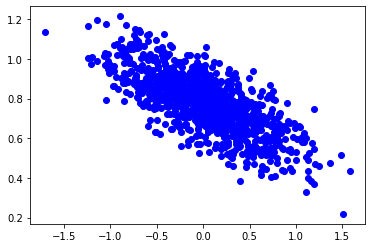

In [139]:
plt.scatter(x_point,y_point,c='b')
plt.show()

In [140]:
real_x = np.array(x_point)
real_y = np.array(y_point)

In [141]:
def loss_fn(real_y, pred_y):
    return tf.reduce_mean((real_y - pred_y)**2)

In [142]:
import random
a = tf.Variable(random.random())
b = tf.Variable(random.random())

In [143]:
Loss = []
epochs = 1000
learning_rate = 0.01

for _ in range(epochs):
  with tf.GradientTape() as tape:
    pred_y = a * real_x + b
    loss = loss_fn(real_y, pred_y)
    Loss.append(loss.numpy())

  dloss_da, dloss_db = tape.gradient(loss,(a, b))

  a.assign_sub(learning_rate*dloss_da)  #a = a - alpha*dloss_da
  b.assign_sub(learning_rate*dloss_db)  #b = b - alpha*dloss_db

In [144]:
np.max(Loss),np.min(Loss)

(0.2553488, 0.010641033)

In [145]:
print(a.numpy())
print(b.numpy())

-0.21870963
0.78094


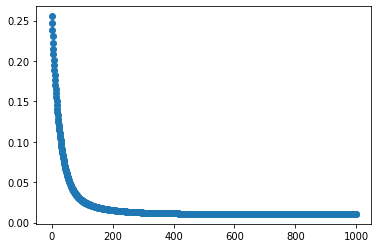

In [146]:
plt.scatter(np.arange(epochs),Loss)
plt.show()

In [147]:
max = np.max(x_point)
min = np.min(x_point)

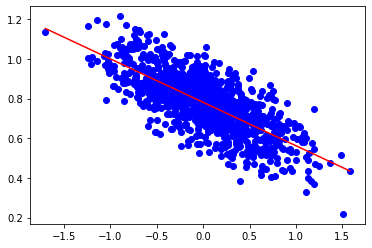

In [148]:
X = np.linspace(min, max, num=10)
plt.plot(X,a.numpy()*X+b.numpy(),c='r')
plt.scatter(x_point,y_point,c="b")
plt.show()

In [149]:
def subset_dataset(x_dataset, y_dataset, subset_size):
    arr = np.arange(len(x_dataset))
    np.random.shuffle(arr) 
    x_train = x_dataset[arr[0:subset_size]]
    y_train = y_dataset[arr[0:subset_size]]
    return x_train,y_train

In [150]:
a = tf.Variable(random.random())
b = tf.Variable(random.random())

In [151]:
Loss = []
epochs = 1000
learning_rate = 0.2
batch_size = 50

for i in range(epochs):
  real_x_batch,real_y_batch = subset_dataset(real_x,real_y,batch_size)
  with tf.GradientTape() as tape:
    pred_y = a * real_x_batch + b
    loss = loss_fn(real_y_batch, pred_y)
    Loss.append(loss.numpy())

  dloss_da, dloss_db = tape.gradient(loss,(a, b))

  a.assign_sub(learning_rate*dloss_da)  #a = a - alpha*dloss_da
  b.assign_sub(learning_rate*dloss_db)  #b = b - alpha*dloss_db

In [152]:
np.max(Loss),np.min(Loss)

(0.24657296, 0.0058904802)

In [153]:
print(a.numpy())
print(b.numpy())

-0.20982282
0.77441996


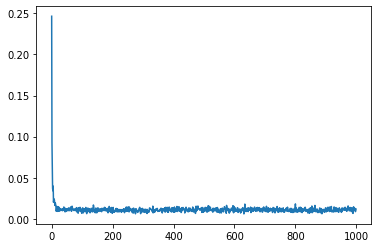

In [154]:
plt.plot(Loss)
plt.show()

ZAD 4

In [155]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
df = pd.read_csv('Boston.csv')
print(df)

     Unnamed: 0     crim    zn  indus  chas    nox     rm   age     dis  rad  \
0             1  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1   
1             2  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2   
2             3  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2   
3             4  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3   
4             5  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3   
..          ...      ...   ...    ...   ...    ...    ...   ...     ...  ...   
501         502  0.06263   0.0  11.93     0  0.573  6.593  69.1  2.4786    1   
502         503  0.04527   0.0  11.93     0  0.573  6.120  76.7  2.2875    1   
503         504  0.06076   0.0  11.93     0  0.573  6.976  91.0  2.1675    1   
504         505  0.10959   0.0  11.93     0  0.573  6.794  89.3  2.3889    1   
505         506  0.04741   0.0  11.93     0  0.573  6.030  80.8  2.5050    1   

     tax  ptratio   black  lstat  medv 

In [156]:

df.head()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [157]:
rm=df.iloc[:,6]

In [158]:
rm

0      6.575
1      6.421
2      7.185
3      6.998
4      7.147
       ...  
501    6.593
502    6.120
503    6.976
504    6.794
505    6.030
Name: rm, Length: 506, dtype: float64

In [159]:
medv=df.iloc[:,14]

In [160]:
medv

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: medv, Length: 506, dtype: float64

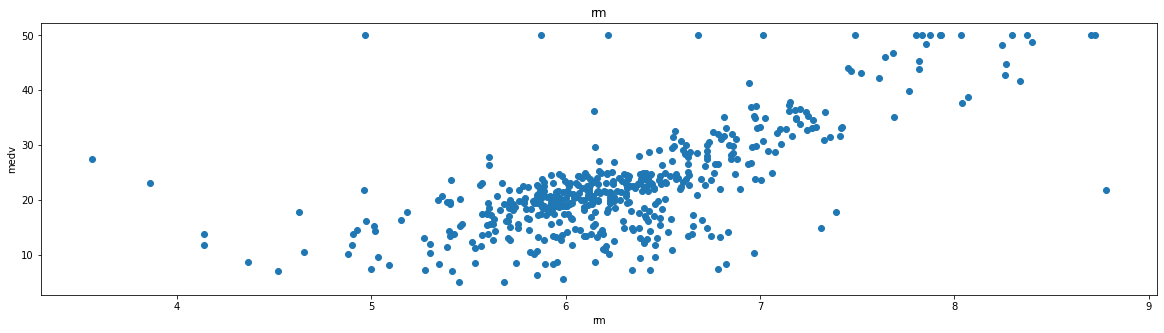

In [161]:
plt.figure(figsize=(20, 5))

features = ['rm']
target = df['medv']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = df[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('medv')

In [162]:
real_rm = np.array(rm)
real_medv = np.array(medv)

In [163]:
real_rm

array([6.575, 6.421, 7.185, 6.998, 7.147, 6.43 , 6.012, 6.172, 5.631,
       6.004, 6.377, 6.009, 5.889, 5.949, 6.096, 5.834, 5.935, 5.99 ,
       5.456, 5.727, 5.57 , 5.965, 6.142, 5.813, 5.924, 5.599, 5.813,
       6.047, 6.495, 6.674, 5.713, 6.072, 5.95 , 5.701, 6.096, 5.933,
       5.841, 5.85 , 5.966, 6.595, 7.024, 6.77 , 6.169, 6.211, 6.069,
       5.682, 5.786, 6.03 , 5.399, 5.602, 5.963, 6.115, 6.511, 5.998,
       5.888, 7.249, 6.383, 6.816, 6.145, 5.927, 5.741, 5.966, 6.456,
       6.762, 7.104, 6.29 , 5.787, 5.878, 5.594, 5.885, 6.417, 5.961,
       6.065, 6.245, 6.273, 6.286, 6.279, 6.14 , 6.232, 5.874, 6.727,
       6.619, 6.302, 6.167, 6.389, 6.63 , 6.015, 6.121, 7.007, 7.079,
       6.417, 6.405, 6.442, 6.211, 6.249, 6.625, 6.163, 8.069, 7.82 ,
       7.416, 6.727, 6.781, 6.405, 6.137, 6.167, 5.851, 5.836, 6.127,
       6.474, 6.229, 6.195, 6.715, 5.913, 6.092, 6.254, 5.928, 6.176,
       6.021, 5.872, 5.731, 5.87 , 6.004, 5.961, 5.856, 5.879, 5.986,
       5.613, 5.693,

In [164]:
import random
a = tf.Variable(random.random())
b = tf.Variable(random.random())

In [165]:
def subset_dataset(x_dataset, y_dataset, subset_size):
    arr = np.arange(len(x_dataset))
    np.random.shuffle(arr) 
    x_train = x_dataset[arr[0:subset_size]]
    y_train = y_dataset[arr[0:subset_size]]
    return x_train,y_train

In [166]:
def loss_fn(real_y, pred_y):
    return tf.reduce_mean((real_y - pred_y)**2)

In [167]:
Loss = []
epochs = 1000
learning_rate = 0.01
batch_size = 50
a = tf.Variable(random.random())
b = tf.Variable(random.random())
for _ in range(epochs):
  real_rm_batch,real_medv_batch = subset_dataset(real_rm,real_medv,batch_size)
  with tf.GradientTape() as tape:
    pred_medv = a * real_rm_batch + b
    loss = loss_fn(real_medv_batch, pred_medv)
    Loss.append(loss.numpy())

  dloss_da, dloss_db = tape.gradient(loss,(a, b))

  a.assign_sub(learning_rate*dloss_da)  #a = a - alpha*dloss_da
  b.assign_sub(learning_rate*dloss_db)  #b = b - alpha*dloss_db

In [168]:
Loss

[226.16956,
 79.31792,
 49.980816,
 60.062347,
 48.231678,
 69.12293,
 40.349503,
 40.896236,
 57.683205,
 87.89928,
 70.227455,
 84.481346,
 39.210392,
 65.66733,
 51.26597,
 48.602352,
 53.32183,
 84.679665,
 37.08332,
 54.28287,
 33.850304,
 73.664604,
 106.3289,
 44.916264,
 53.826977,
 48.285713,
 44.715256,
 44.363564,
 80.31397,
 71.36767,
 98.56625,
 61.783985,
 47.527565,
 95.34978,
 87.99671,
 82.69318,
 42.21935,
 47.68462,
 29.766596,
 51.714233,
 70.70393,
 55.030087,
 55.786354,
 93.33308,
 80.31659,
 48.52298,
 71.692055,
 81.92575,
 53.634884,
 57.56643,
 60.544666,
 76.84521,
 50.61041,
 49.902626,
 66.085945,
 40.800034,
 84.72904,
 55.7225,
 49.148563,
 59.086163,
 61.05307,
 48.346832,
 77.42142,
 57.344337,
 55.30274,
 41.28211,
 56.751564,
 33.94768,
 81.02958,
 63.07519,
 36.221676,
 32.682713,
 53.932407,
 53.75534,
 92.81853,
 42.114803,
 92.31955,
 61.430843,
 61.657562,
 45.70492,
 69.04531,
 60.97951,
 90.128075,
 51.791203,
 23.786026,
 94.8614,
 46.159073,

In [169]:
np.max(Loss),np.min(Loss)

(226.16956, 17.60775)

In [170]:
print(a.numpy())
print(b.numpy())

4.855049
-6.8641143


In [171]:
import tensorflow as tf
import keras 
from keras.layers import Dense
from keras.models import Sequential

In [172]:
model=Sequential()

In [173]:
model.add(Dense(units = 3, use_bias=True, input_dim=1, activation = "linear"))
model.add(Dense(units = 1, use_bias=True,  activation = "linear"))

In [174]:
opt = tf.keras.optimizers.Adam()

In [175]:
model.compile(loss='MSE',optimizer=opt)


In [176]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 3)                 6         
                                                                 
 dense_5 (Dense)             (None, 1)                 4         
                                                                 
Total params: 10
Trainable params: 10
Non-trainable params: 0
_________________________________________________________________


In [113]:
epochs = 200
h = model.fit(real_rm,real_medv, verbose=1, epochs=epochs, batch_size=100, validation_split=0.3)

Epoch 1/2000
4/4 [==============================] - 0s 49ms/step - loss: 981.3584 - val_loss: 519.3033
Epoch 2/2000
4/4 [==============================] - 0s 11ms/step - loss: 973.7271 - val_loss: 514.3121
Epoch 3/2000
4/4 [==============================] - 0s 14ms/step - loss: 966.0961 - val_loss: 509.3654
Epoch 4/2000
4/4 [==============================] - 0s 11ms/step - loss: 958.5715 - val_loss: 504.4462
Epoch 5/2000
4/4 [==============================] - 0s 10ms/step - loss: 951.2238 - val_loss: 499.5541
Epoch 6/2000
4/4 [==============================] - 0s 19ms/step - loss: 943.7359 - val_loss: 494.7229
Epoch 7/2000
4/4 [==============================] - 0s 10ms/step - loss: 936.2925 - val_loss: 489.9412
Epoch 8/2000
4/4 [==============================] - 0s 11ms/step - loss: 929.0803 - val_loss: 485.1887
Epoch 9/2000
4/4 [==============================] - 0s 11ms/step - loss: 921.7902 - val_loss: 480.4931
Epoch 10/2000
4/4 [==============================] - 0s 10ms/step - loss:

In [114]:
#Loss = h.history['loss']
#Loss

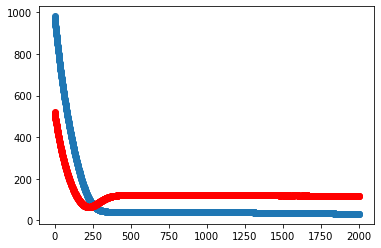

In [115]:
plt.scatter(np.arange(epochs),h.history['loss'])
plt.scatter(np.arange(epochs),h.history['val_loss'],c='r')
plt.show()

Zadanie 5

In [116]:
import tensorflow as tf
import matplotlib.pyplot as plt 
import numpy as np

In [117]:
import keras
from keras.models import Sequential
from keras.layers import Dense

Dwa gangi

Zbiór danych:

In [118]:
[0]*10+[1]*10

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

In [119]:
x_label1 = np.random.normal(3, 1, 1000)
y_label1 = np.random.normal(2, 1, 1000) 
x_label2 = np.random.normal(7, 1, 1000)
y_label2 = np.random.normal(6, 1, 1000)

xs = np.append(x_label1, x_label2)
ys = np.append(y_label1, y_label2) 
labels = np.asarray([0.]*len(x_label1)+[1.]*len(x_label2))
labels

array([0., 0., 0., ..., 1., 1., 1.])

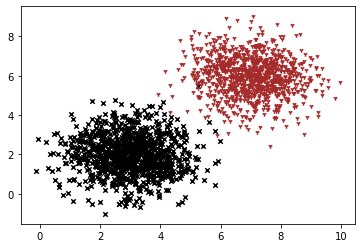

In [120]:
plt.scatter(x_label1, y_label1, c='black', marker='x', s=20)
plt.scatter(x_label2, y_label2, c='brown', marker='1', s=20)
plt.show()

In [121]:
x_label1

array([ 2.94715647,  2.37915847,  3.6306877 ,  3.39009443,  2.80809939,
        4.15660793,  3.25751258,  4.39010234,  4.86974843,  5.9011268 ,
        3.29182586,  2.98503887,  2.18219403,  3.51557859,  3.31703364,
        4.58896877,  3.34400632,  2.334032  ,  1.93519508,  3.07577146,
        3.41596957,  0.3930617 ,  2.94604398,  1.04812124,  3.49876671,
        2.34934118,  4.26302464,  4.14240873,  2.60897482,  3.42074308,
        2.59970195,  3.28890898,  3.37567507,  3.13112342,  4.34409214,
        2.77712944,  4.79295031,  2.46093059,  1.94972509,  2.1714886 ,
        2.69139149,  1.49026739,  3.54156992,  3.44766022,  2.85751594,
        2.84485994,  3.42989966,  2.99086784,  0.83459739,  3.46737184,
        5.80676694,  2.09946108,  1.9826724 ,  4.03268202,  3.06121854,
        1.9966051 ,  3.47173696,  2.10434567,  2.51233781,  4.12021954,
        2.96554434,  4.85164532,  2.17918652,  1.19170151,  4.18262845,
        1.65123904,  1.52504411,  2.22009846,  2.16993964,  3.77

In [122]:
def loss_fn_grad(y, y_model):
 return tf.reduce_mean(-y*tf.math.log(y_model)-(1-y)*tf.math.log(1-y_model))

In [123]:
def subset_dataset_2(x_dataset, y_dataset,label,subset_size):
    arr = np.arange(len(x_dataset))
    np.random.shuffle(arr) 
    x_train = x_dataset[arr[0:subset_size]]
    y_train = y_dataset[arr[0:subset_size]]
    label_train = label[arr[0:subset_size]]
    return x_train,y_train,label_train

In [124]:
labels.shape

(2000,)

In [125]:
Loss = []
epochs = 1000
learning_rate = 0.01
batch_size = 50
a = tf.Variable(random.random())
b = tf.Variable(random.random())
c = tf.Variable(random.random())
for _ in range(epochs):
  xs_batch,ys_batch,labels_batch = subset_dataset_2(xs,ys,labels,batch_size)
  with tf.GradientTape() as tape:
    pred_l = tf.sigmoid(a * xs_batch + b * ys_batch + c)
    #print(label_batch.shape)
    loss = loss_fn_grad(labels_batch, pred_l)
    Loss.append(loss.numpy())

  dloss_da, dloss_db, dloss_dc = tape.gradient(loss,(a, b,c))

  a.assign_sub(learning_rate*dloss_da)  #a = a - alpha*dloss_da
  b.assign_sub(learning_rate*dloss_db)  #b = b - alpha*dloss_db
  c.assign_sub(learning_rate*dloss_dc)

In [126]:
np.max(Loss),np.min(Loss)

(2.9938192, 0.32082856)

In [127]:
print(a.numpy())
print(b.numpy())

-0.058886457
0.52488345


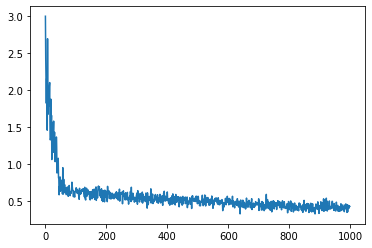

In [128]:
plt.plot(Loss)
plt.show()

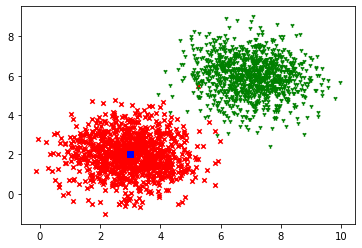

In [129]:
x=3.0
y=2.0 
plt.scatter(x_label1, y_label1, c='r', marker='x', s=20)
plt.scatter(x_label2, y_label2, c='g', marker='1', s=20)
plt.scatter(x,y,c='b', marker='s')
plt.show()

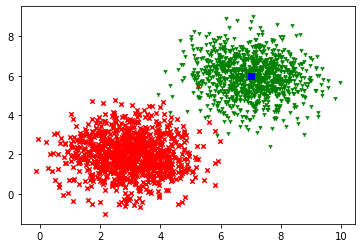

In [130]:
x=7.0
y=6.0 
plt.scatter(x_label1, y_label1, c='r', marker='x', s=20)
plt.scatter(x_label2, y_label2, c='g', marker='1', s=20)
plt.scatter(x,y,c='b', marker='s')
plt.show()

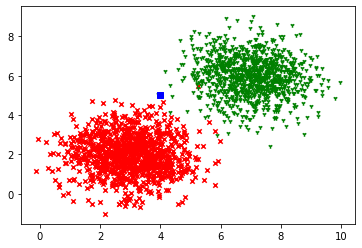

In [131]:
x=4.0
y=5.0 
plt.scatter(x_label1, y_label1, c='r', marker='x', s=20)
plt.scatter(x_label2, y_label2, c='g', marker='1', s=20)
plt.scatter(x,y,c='b', marker='s')
plt.show()